## LSTM Example

We want to train an univariate, one feature LSTM

**0) Loading Libraries and Subroutines**

Standard libraries for plotting and numerical operations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
GRAPE_df = pd.read_pickle('pkl_data/GRAPE.pkl')
UW_df = pd.read_pickle('pkl_data/UW.pkl')

In [75]:
rows_not_nan = UW_df[UW_df.iloc[:,18].notna()]
print(rows_not_nan)

Visit Number                                                 1   \
ID                                                                
1048-OD       [27, 28, 29, 27, 32, 31, 30, 29, 30, 29, 30, 3...   
1048-OS       [28, 29, 29, 27, 29, 31, 32, 27, 31, 30, 29, 3...   

Visit Number                                                 2   \
ID                                                                
1048-OD       [25, 30, 30, 30, 32, 32, 32, 33, 32, 32, 31, 3...   
1048-OS       [27, 26, 30, 30, 29, 30, 27, 30, 29, 31, 31, 3...   

Visit Number                                                 3   \
ID                                                                
1048-OD       [28, 28, 29, 26, 31, 32, 31, 31, 33, 30, 29, 3...   
1048-OS       [30, 29, 26, 27, 29, 31, 31, 30, 31, 32, 31, 3...   

Visit Number                                                 4   \
ID                                                                
1048-OD       [23, 28, 19, 19, 22, 27, 28, 27, 24, 25, 22, 

In [78]:
rows = UW_df.loc[['1048-OD', '1048-OS']]

print(rows)

Visit Number                                                 1   \
ID                                                                
1048-OD       [27, 28, 29, 27, 32, 31, 30, 29, 30, 29, 30, 3...   
1048-OS       [28, 29, 29, 27, 29, 31, 32, 27, 31, 30, 29, 3...   

Visit Number                                                 2   \
ID                                                                
1048-OD       [25, 30, 30, 30, 32, 32, 32, 33, 32, 32, 31, 3...   
1048-OS       [27, 26, 30, 30, 29, 30, 27, 30, 29, 31, 31, 3...   

Visit Number                                                 3   \
ID                                                                
1048-OD       [28, 28, 29, 26, 31, 32, 31, 31, 33, 30, 29, 3...   
1048-OS       [30, 29, 26, 27, 29, 31, 31, 30, 31, 32, 31, 3...   

Visit Number                                                 4   \
ID                                                                
1048-OD       [23, 28, 19, 19, 22, 27, 28, 27, 24, 25, 22, 

In [77]:
UW_df.tail()

Visit Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,,,,,,,,,,,,,,,,,,,
993-OS,"[29, 25, 24, 30, 30, 31, 32, 31, 31, 30, 25, 3...","[34, 30, 32, 29, 35, 34, 34, 32, 32, 29, 30, 3...","[29, 31, 31, 30, 32, 31, 30, 29, 30, 26, 26, 3...","[28, 28, 27, 30, 31, 29, 30, 29, 31, 32, 30, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994-OD,"[31, 27, 27, 30, 33, 32, 31, 33, 32, 33, 30, 3...","[29, 28, 27, 35, 31, 29, 31, 31, 30, 33, 29, 3...","[27, 33, 26, 28, 28, 32, 31, 31, 33, 31, 32, 3...","[27, 27, 29, 30, 32, 26, 31, 32, 30, 33, 32, 3...","[30, 29, 31, 29, 32, 32, 31, 31, 30, 32, 34, 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994-OS,"[28, 32, 26, 32, 32, 33, 33, 31, 33, 33, 32, 3...","[30, 29, 26, 28, 29, 31, 31, 31, 30, 27, 28, 3...","[29, 31, 27, 26, 32, 30, 33, 32, 30, 31, 33, 3...","[30, 32, 29, 30, 32, 33, 33, 31, 32, 33, 32, 3...","[31, 32, 31, 34, 33, 32, 33, 31, 33, 28, 33, 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996-OD,"[30, 30, 19, 26, 30, 31, 30, 29, 30, 25, 28, 3...","[28, 30, 26, 29, 30, 29, 31, 30, 29, 28, 30, 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996-OS,"[29, 26, 25, 20, 29, 29, 29, 26, 28, 28, 29, 3...","[27, 28, 22, 24, 28, 29, 29, 24, 28, 28, 27, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
UW_df_fill.head()

Visit Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,,,,,,,,,,,,,,,,,,,
1-OD,"[10, 9, -1, 10, 21, 24, 21, 18, 20, 19, 17, 23...","[19, 20, 22, 20, 19, 24, 22, 24, 25, 23, 17, 2...","[15, 23, 20, 21, 26, 24, 26, 28, 26, 25, 19, 2...","[13, 16, 11, 6, 5, 22, 24, 20, 23, 23, 18, 23,...","[21, 19, 19, 14, 19, 24, 23, 17, 21, 22, 17, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2..."
1-OS,"[-1, 17, -1, -1, 19, 23, 18, 18, 25, 20, 18, 2...","[11, -1, 8, -1, 10, 17, 20, 19, 21, 25, 16, 22...","[11, 9, -1, 10, 22, 23, 21, 10, 23, 18, 19, 24...","[7, -1, 3, -1, 15, 21, 14, 15, 18, 15, 15, 22,...","[9, 10, -1, 16, 19, 22, 23, 18, 23, 21, 11, 24...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2..."
1000-OD,"[23, 23, 23, 20, 25, 26, 24, 19, 22, 16, 25, 2...","[27, 26, 21, 24, 28, 28, 25, 21, 21, 21, 28, 2...","[23, 18, 17, 21, 24, 26, 24, 21, 20, 19, 23, 2...","[19, 20, 16, 22, 29, 24, 26, 24, 13, 10, 22, 2...","[21, 13, 10, 15, 23, 21, 14, 17, 16, 15, 5, 21...","[12, 14, 8, 10, 11, 16, 16, 11, 16, 11, 12, 12...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18..."
1000-OS,"[16, 21, 15, 16, 19, 11, -1, 19, 6, 17, 19, 23...","[4, 22, 21, 20, 1, 11, 18, 20, 24, 21, 12, 24,...","[-1, 5, 15, 18, 11, 23, 18, 21, 15, 15, 20, 25...","[18, 17, 13, -1, 9, 12, 15, 8, 19, 18, 11, 17,...","[-1, 15, 21, 12, 13, 6, 8, 7, 16, 22, 16, 26, ...","[14, 13, 16, 9, 15, 20, 14, -1, 16, 18, 13, 21...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20

In [29]:
#fill forward - replace NaNs with previous visits data
GRAPE_df_fill = GRAPE_df.fillna(method='ffill', axis=1)
UW_df_fill = UW_df.fillna(method='ffill', axis=1)

/tmp/ipykernel_32266/2976799229.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  GRAPE_df_fill = GRAPE_df.fillna(method='ffill', axis=1)
/tmp/ipykernel_32266/2976799229.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  UW_df_fill = UW_df.fillna(method='ffill', axis=1)


In [39]:
print(len(GRAPE_df_fill[1][1]))
print(len(UW_df_fill[1][1]))

60
54


/tmp/ipykernel_32266/2018451108.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(GRAPE_df_fill[1][1]))
/tmp/ipykernel_32266/2018451108.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(UW_df_fill[1][1]))


In [43]:
UW_df_fill[1][1][1]

/tmp/ipykernel_32266/3748267595.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  UW_df_fill[1][1][1]


17

In [42]:
print(len(GRAPE_df_fill[1]))
print(len(UW_df_fill[1][1]))

263
54


/tmp/ipykernel_32266/3942610778.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(UW_df_fill[1][1]))


In [41]:
UW_df_fill.shape

(7428, 19)

Loading LSTM related keras libraries:

In [58]:
from keras import optimizers
from keras.layers import LSTM
from keras.layers import Dense, Masking, TimeDistributed, Reshape
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

Calling a subroutine that puts data set in the correct shape for LSTM (see later)

In [18]:
from prepare_data import prepare_data

<br>

**1) Generating a Simple Dataset**

**2) Preprocessing the Data**

In [48]:
#need to convert to 3d array: patients x visits x features, where features is 54 sens vals
patients = UW_df_fill.shape[0]
visits = UW_df_fill.shape[1]
features = len(UW_df_fill.iloc[0, 0])
UW_3d = np.zeros((patients, visits, features), dtype= float)
for patient in range(patients):
    for visit in range(visits):
        feature_list = UW_df_fill.iloc[patient, visit]
        for feature in range(features):
            UW_3d[patient, visit, feature] = feature_list[feature]

(7428, 19, 54)


2a) Scaling:

In [49]:
#flatten out to scale, replace -1 w/ NaN so its ignored in scaling
UW_flat = UW_3d.reshape(-1, features)
UW_flat_nan = np.where(UW_flat == -1, np.nan, UW_flat)

scaler  = MinMaxScaler(feature_range = (0, 1))
UW_scaled_flat = scaler.fit_transform(np.nan_to_num(UW_flat_nan, nan = 0.0))
UW_scaled_flat[np.isnan(UW_flat_nan)] = -1
UW_scaled = UW_scaled_flat.reshape(patients, visits, features)
print(UW_scaled.shape)

(7428, 19, 54)


2b) Reshaping the Data

The dataset has only one feature. We want to predict *dt_futu* data points into the future and train the LSTM with the previous *dt_past* time steps to predict the next. For that purpose, we need to reshape the data in such a way that *dt_futu* is interpreted as features. Therefore, we run the following subroutine:<br>
<br>

In [54]:
patient_indices = np.arange(patients)
np.random.seed(42)
np.random.shuffle(patient_indices)
train_split = int(np.round(0.7 * patients))

train_indices = patient_indices[:train_split]
test_indices = patient_indices[train_split:]

In [55]:
#past + fture <= 19
#patient - level splitting. indiv patient data not in both test / train
dt_past    = 10
dt_futu    = 5
n_features = 54
Xs_train, Xs_test = [], []
Ys_train, Ys_test = [], []

for p_idx in train_indices:
    [X, Y] = prepare_data(UW_scaled[p_idx], dt_past, dt_futu)
    Xs_train.append(X)
    Ys_train.append(Y)

for p_idx in test_indices:
    [X, Y] = prepare_data(UW_scaled[p_idx], dt_past, dt_futu)
    Xs_test.append(X)
    Ys_test.append(Y)


X_Train = np.vstack(Xs_train)
Y_Train = np.vstack(Ys_train)
X_Test = np.vstack(Xs_test)
Y_Test = np.vstack(Ys_test)

print(X_Train.shape, Y_Train.shape)
print(X_Test.shape, Y_Test.shape)

(26000, 10, 54) (26000, 5, 54)
(11140, 10, 54) (11140, 5, 54)


<br>

Let us check the shapes:

In order to train the LSTM with $dt_{futu}$ and $dt_{past}$, we need the first $dt_{past}$ steps in order to train for the next prediction. The length of the period we want to predict is $dt_{futu}$. The last step in the training will be the point, when we predict the last sequence $dt_{futu}$ with the previous steps $dt_{past}$. Thus, the training data set has the length $len\left(Y_{tnorm}\right) - dt_{past} - dt_{futu} + 1$. Each time point in the past we need for the prediction will have its own influence on the future and therefore are regarded as feature. Thus, $X$ has to have the shape $\left[len\left(Y_{tnorm}\right) - dt_{past} - dt_{futu} + 1\right] \times dt_{past}$.<br>   
Because of that interpretation, each feature is shifted by one time point:

<br>

Following the same logic, in order to train the LSTM to predict the future $dt_{futu}$ ahead, $Y$ needs to have the same structure: 

<br>

2c) Splitting data into Training and Test dataset

Just to make sure, that the shape is *len(X) x dt_past x n_features*

<br>

**3) Creating the Model**

Creating a LSTM in Python follows the same syntax as for CNNs. We want to predict data points in the future, based on previous data points. Therefore, we need to solve a **regression** problem:<br>

In [61]:
n_neurons  = 256
batch_size = 128

model = Sequential()
model.add(Masking(mask_value = -1, input_shape = (dt_past, n_features)))
model.add(LSTM(n_neurons, input_shape = (dt_past, n_features), activation = 'tanh', return_sequences = False))
model.add(Dense(dt_futu * n_features))
model.add(Reshape((dt_futu, n_features)))

opt = optimizers.Adam()
model.compile(loss = 'mean_squared_error', optimizer = opt)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_2 (Masking)             │ (None, 10, 54)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 256)            │       318,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 270)            │        69,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 5, 54)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387,854 (1.48 MB)

 Trainable params: 387,854 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

<br>

**4) Running the Fit**

In [62]:
n_epochs = 75
out = model.fit(X_Train, Y_Train, epochs = n_epochs, batch_size = batch_size, validation_data= (X_Test, Y_Test), verbose = 2, shuffle = True)

Epoch 1/75
204/204 - 16s - 77ms/step - loss: 0.0621 - val_loss: 0.0254
Epoch 2/75
204/204 - 12s - 60ms/step - loss: 0.0149 - val_loss: 0.0095
Epoch 3/75
204/204 - 12s - 58ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 4/75
204/204 - 12s - 59ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 5/75
204/204 - 12s - 58ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 6/75
204/204 - 13s - 61ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/75
204/204 - 13s - 65ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/75
204/204 - 14s - 69ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/75
204/204 - 13s - 65ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 10/75
204/204 - 13s - 64ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 11/75
204/204 - 13s - 66ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 12/75
204/204 - 13s - 65ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 13/75
204/204 - 13s - 65ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 14/75
204/204 - 13s - 65ms/step - loss: 0.0025 - val_loss: 0.0027
E

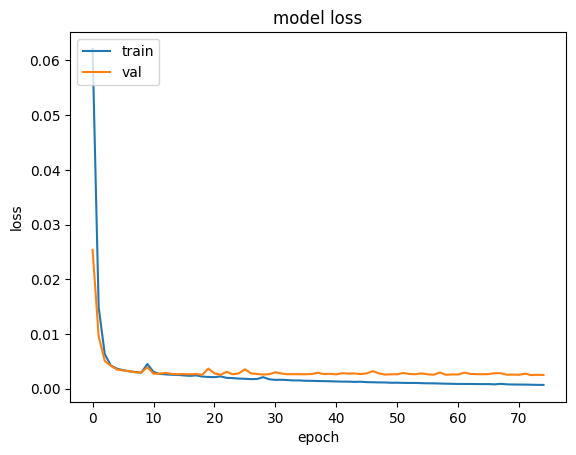

In [63]:
#plotting #############################################################
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('training loss.pdf')
plt.show()
#######################################################################

<br>

**5) Evaluating the Fit**

In [79]:
test_id = '1048-OD'
test_pat = UW_df.index.get_loc(test_id)
X_pat, Y_pat = prepare_data(UW_scaled[test_pat], dt_past, dt_futu)

In [80]:
PredY_pat = model.predict(X_pat)
i = -1
actual = Y_pat[i]
pred = PredY_pat[i]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


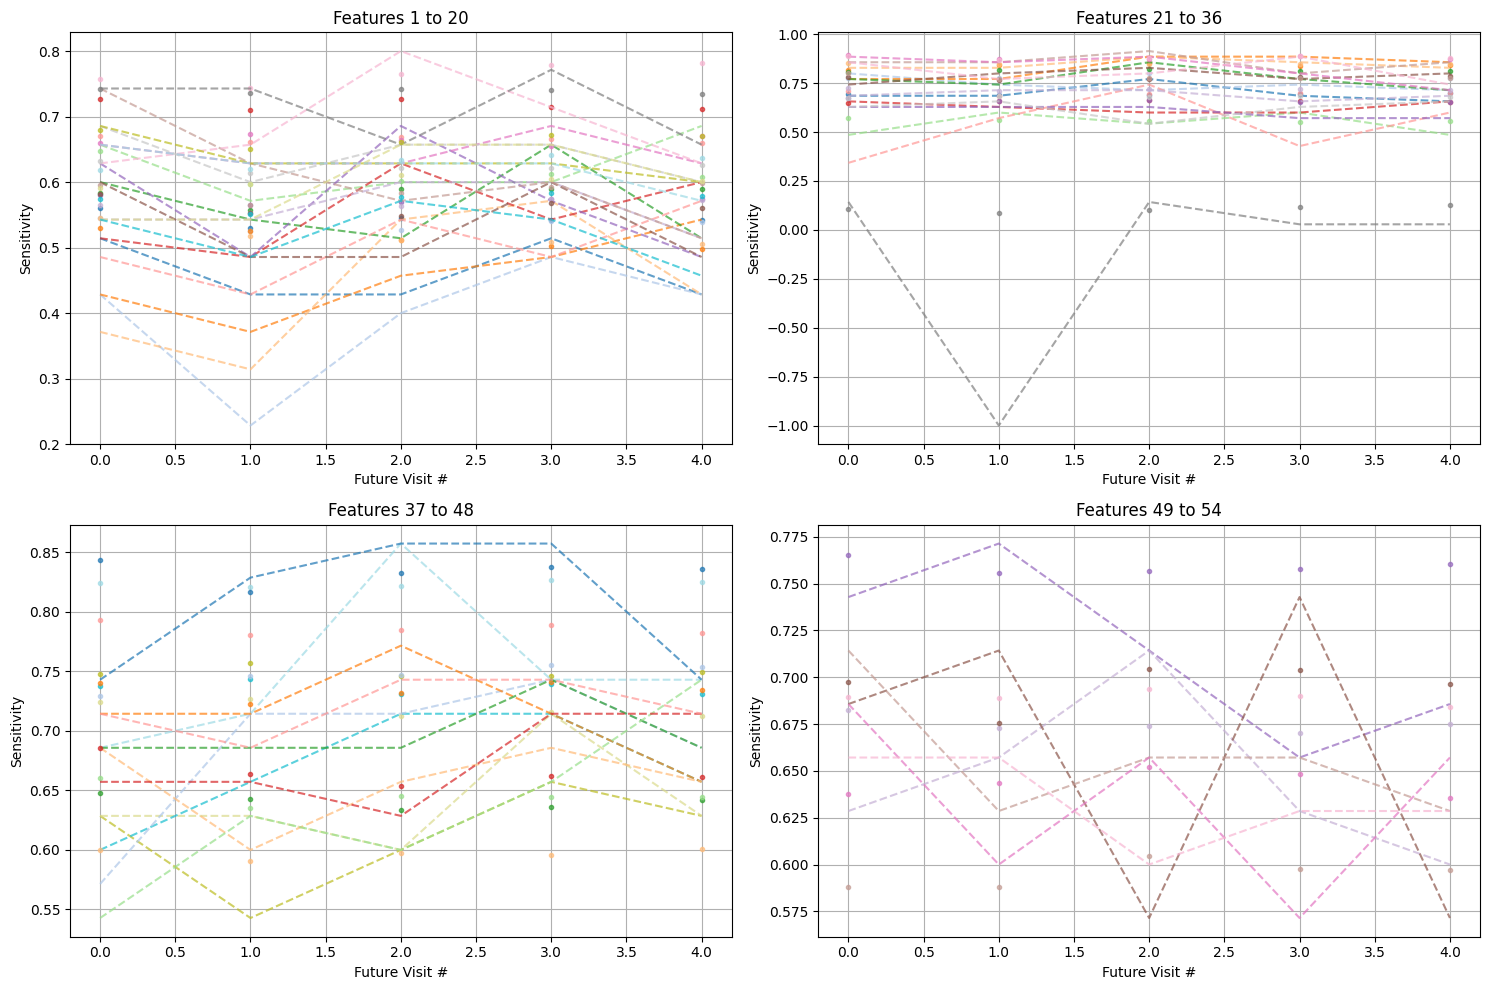

In [85]:
feature_ranges = [(0,20), (20,36), (36,48), (48,54)]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, (start, end) in enumerate(feature_ranges):
    ax = axes[i]
    for f in range(start, end):
        color = plt.cm.tab20(f % 20)
        ax.plot(actual[:, f], '--', color = color, alpha=0.7)
        ax.plot(pred[:, f], '.', color = color, alpha=0.7)
    ax.set_title(f'Features {start+1} to {end}')
    ax.set_xlabel('Future Visit #')
    ax.set_ylabel('Sensitivity')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(t, Y_tnorm, linewidth = 5)
plt.plot(t[-back:], PredY[:, dt_futu-1])
plt.legend(['actual data', 'prediction'])
plt.fill_between([t[-back,0], t[-1,0]], 0, 1, color = 'k', alpha = 0.1)
plt.plot([t[-back,0], t[-back,0]], [0, 1], 'k-', linewidth = 3)
plt.show()

In [ ]:
print(PredY.shape)

In [ ]:
print(TestX.shape)

In [ ]:
PredY[:,:5]

Since the predicted values in each column of PredY refer to different sequences in the future, each shifted by one time point, we can also plot with respect to another reference point (note: for plotting the t axes needs to be shifted by the same time step!):

In [ ]:
#dt_back = 6 #0....dt_futu

#prediction from different reference points
for dt_back in range(dt_futu):
    plt.plot(t, Y_tnorm, linewidth = 5)
    plt.plot(t[-back:] - incr*dt_back, PredY[:, dt_futu-1-dt_back])
    plt.legend(['actual data', 'prediction'])
    plt.fill_between([t[-back,0], t[-1,0]], 0, 1, color = 'k', alpha = 0.1)
    plt.plot([t[-back,0], t[-back,0]], [0, 1], 'k-', linewidth = 3)
    plt.title('reference point dt_futu = ' + str(dt_futu-1-dt_back))
    plt.show()